In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.feature import greycomatrix, greycoprops
from skimage import io

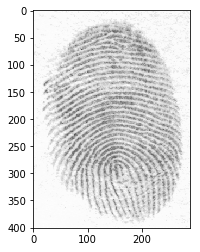

In [2]:
fp1 = io.imread("dbFP/a001_05.pgm")
plt.imshow(fp1, cmap=plt.cm.gray, interpolation='nearest', vmin=0, vmax=255)
plt.show()

# Foreground features

In [3]:
PATCH_SIZE = 21
fgPatch = []

for line in open("dbFP/foreground_fp"):
    #print(len(line))
    
    if(len(line) != 1):

        if(".pgm" in line):
            fpImage_filePath = "dbFP/" + line[:-1]
            print(fpImage_filePath)
            imageFP = io.imread(fpImage_filePath)
            fg_locations = []
            
        
        else:
            locs = line.split()
            #print(locs)
            
            for elem in locs:
                iLoc = elem
                #print(elem)
                
                iLoc = iLoc.split(",")
                #print(iLoc)
                
                rLoc = iLoc[0][1:]
                cLoc = iLoc[1][:-1]
                
                pair = tuple([int(rLoc), int(cLoc)])
                #print(pair)
                #print(type(pair))
                
                fg_locations.append(pair)
                
            print(fg_locations)
            
            for loc in fg_locations:
                patch = imageFP[loc[0] : loc[0] + PATCH_SIZE,
                               loc[1] : loc[1] + PATCH_SIZE]
                
                fgPatch.append(patch)

dbFP/a001_05.pgm
[(71, 96), (108, 139), (163, 192), (258, 85), (318, 197)]
dbFP/a001_07.pgm
[(68, 90), (106, 105), (136, 161), (344, 129), (327, 195)]
dbFP/a001_09.pgm
[(279, 132), (311, 176), (221, 83), (174, 243), (178, 103)]
dbFP/a001_10.pgm
[(133, 48), (173, 131), (209, 153), (194, 95), (259, 142)]
dbFP/a002_04.pgm
[(124, 62), (131, 102), (143, 219), (361, 67), (212, 254)]
dbFP/a002_09.pgm
[(77, 98), (145, 128), (200, 188), (410, 50), (303, 245)]
dbFP/a002_10.pgm
[(105, 62), (147, 114), (211, 83), (240, 181), (63, 83)]
dbFP/a003_02.pgm
[(118, 129), (114, 208), (157, 94), (371, 73), (347, 195)]
dbFP/a003_04.pgm
[(292, 64), (285, 102), (347, 144), (319, 37), (376, 56)]
dbFP/a003_05.pgm
[(58, 203), (109, 138), (188, 98), (252, 141), (275, 105)]
dbFP/a003_07.pgm
[(131, 211), (167, 163), (242, 208), (243, 63), (405, 73)]
dbFP/a003_10.pgm
[(80, 178), (108, 15), (158, 187), (301, 195), (201, 55)]
dbFP/a004_10.pgm
[(98, 167), (145, 111), (166, 178), (253, 222), (222, 78)]
dbFP/a005_02.pgm


In [4]:
len(fgPatch)

250

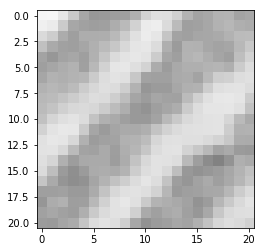

In [5]:
plt.imshow(fgPatch[14], cmap=plt.cm.gray, interpolation='nearest',
          vmin=0, vmax=255)
plt.show()

In [6]:
fg_f1 = []
fg_f2 = []
fg_f3 = []
fg_f4 = []
fg_f5 = []
fg_f6 = []

for patch in fgPatch:
    glcm = greycomatrix(patch, [5], [0], 256, symmetric=True, normed=True)
    fg_f1.append(greycoprops(glcm, 'contrast')[0, 0])
    fg_f2.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    fg_f3.append(greycoprops(glcm, 'homogeneity')[0, 0])
    fg_f4.append(greycoprops(glcm, 'energy')[0, 0])
    fg_f5.append(greycoprops(glcm, 'correlation')[0, 0])
    fg_f6.append(greycoprops(glcm, 'ASM')[0, 0])

In [7]:
len(fg_f1)

250

In [8]:
import numpy as np

X_fg = np.concatenate([np.array(fg_f1).reshape(-1,1), np.array(fg_f2).reshape(-1,1), np.array(fg_f3).reshape(-1,1), np.array(fg_f4).reshape(-1,1), np.array(fg_f5).reshape(-1,1), np.array(fg_f6).reshape(-1,1)], axis = 1)

In [9]:
X_fg.shape

(250, 6)

In [10]:
y_fg = np.array([1 for i in range(len(fg_f1))]).reshape(-1,1)
y_fg = y_fg.astype(dtype=np.int32)

In [11]:
y_fg.shape

(250, 1)

In [12]:
print(y_fg.dtype)
#y_fg

int32


In [13]:
colLabels = ['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation', 'ASM']

# background features

In [14]:
PATCH_SIZE = 21
bgPatch = []

for line in open("dbFP/background_fp.txt"):
    #print(len(line))
    
    if(len(line) != 1):

        if(".pgm" in line):
            fpImage_filePath = "dbFP/" + line[:-1]
            print(fpImage_filePath)
            imageFP = io.imread(fpImage_filePath)
            bg_locations = []
            
        
        else:
            locs = line.split()
            #print(locs)
            
            for elem in locs:
                iLoc = elem
                #print(elem)
                
                iLoc = iLoc.split(",")
                #print(iLoc)
                
                rLoc = iLoc[0][1:]
                cLoc = iLoc[1][:-1]
                
                pair = tuple([int(rLoc), int(cLoc)])
                #print(pair)
                #print(type(pair))
                
                bg_locations.append(pair)
                
            print(bg_locations)
            
            for loc in bg_locations:
                patch = imageFP[loc[0] : loc[0] + PATCH_SIZE,
                               loc[1] : loc[1] + PATCH_SIZE]
                
                bgPatch.append(patch)

dbFP/a001_05.pgm
[(36, 40), (23, 61), (22, 216), (50, 242), (355, 47)]
dbFP/a001_07.pgm
[(439, 32), (447, 203), (450, 212), (19, 235), (18, 28)]
dbFP/a001_09.pgm
[(24, 33), (14, 54), (434, 252), (467, 245), (468, 264)]
dbFP/a001_10.pgm
[(281, 206), (290, 10), (280, 24), (25, 25), (275, 209)]
dbFP/a002_04.pgm
[(36, 277), (18, 26), (36, 32), (448, 35), (484, 51)]
dbFP/a002_09.pgm
[(25, 26), (9, 60), (51, 23), (488, 282), (10, 267)]
dbFP/a002_10.pgm
[(18, 30), (9, 56), (44, 19), (299, 206), (18, 224)]
dbFP/a003_02.pgm
[(10, 36), (70, 24), (115, 14), (440, 270), (24, 263)]
dbFP/a003_04.pgm
[(21, 178), (66, 189), (56, 18), (439, 12), (37, 29)]
dbFP/a003_05.pgm
[(21, 231), (55, 238), (62, 249), (323, 12), (79, 252)]
dbFP/a003_07.pgm
[(13, 25), (16, 63), (17, 242), (63, 271), (458, 26)]
dbFP/a003_10.pgm
[(296, 211), (306, 207), (14, 24), (36, 31), (18, 219)]
dbFP/a004_10.pgm
[(30, 248), (65, 273), (23, 17), (333, 238), (13, 161)]
dbFP/a005_02.pgm
[(360, 24), (384, 32), (389, 50), (392, 86), (

In [15]:
len(bgPatch)

250

In [16]:
bg_f1 = []
bg_f2 = []
bg_f3 = []
bg_f4 = []
bg_f5 = []
bg_f6 = []

for patch in bgPatch:
    glcm = greycomatrix(patch, [5],[0], 256, symmetric=True, normed=True)
    bg_f1.append(greycoprops(glcm, 'contrast')[0, 0])
    bg_f2.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    bg_f3.append(greycoprops(glcm, 'homogeneity')[0, 0])
    bg_f4.append(greycoprops(glcm, 'energy')[0, 0])
    bg_f5.append(greycoprops(glcm, 'correlation')[0, 0])
    bg_f6.append(greycoprops(glcm, 'ASM')[0, 0])

In [17]:
import numpy as np

X_bg = np.concatenate([np.array(bg_f1).reshape(-1,1), np.array(bg_f2).reshape(-1,1), np.array(bg_f3).reshape(-1,1), np.array(bg_f4).reshape(-1,1), np.array(bg_f5).reshape(-1,1), np.array(bg_f6).reshape(-1,1)], axis = 1)

In [18]:
X_bg.shape

(250, 6)

In [19]:
y_bg = np.array([0 for i in range(len(bg_f1))]).reshape(-1,1)

In [20]:
X = np.concatenate([X_fg,X_bg])

In [21]:
X.shape

(500, 6)

In [22]:
y = np.concatenate([y_fg,y_bg])

In [23]:
y.shape

(500, 1)

In [24]:
import pandas as pd

fpData = pd.DataFrame(data=X, columns=colLabels)

In [25]:
fpLabel = pd.Series(data=y.ravel())

In [26]:
fpData['Label'] = fpLabel

In [27]:
fpData.to_csv("fpData.csv", index=False)

In [28]:
fpData.shape

(500, 7)